**Fourier Transformation**




In [1]:
from math import pi , exp

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from numpy import newaxis


**DFT of a vector**

The discrete fourier transform of a vector *a* can be expressed as matrix-vector product of the vector *a* and a transformation matrix *W* with *W[k,j] = exp(2 x pi x i x j x k / N)*




In [2]:
def DFT_1D(a, cutoff = 10 ):
    """ Disctrete fourier transform of a 1D vectro with a transformation matrix W
        param:
        a       :np.array       :input vectro
        cutoff  :int            :rounding cutoff for exp. function
    """
    
    N = len(a)
    W = np.array([[np.exp((-2*pi*1j*i*j)/N)for j in range(N)] for i in range(N)])
    a_t = a.dot(W)

    return a_t

In [144]:
def DFT_2D(A):

    N, M = A.shape

    X = np.zeros((N,M),dtype=complex)

    for k in range(N):
        for l in range(M):
            expr = [[ A[n,m] * np.exp(-2 * pi * 1j *((k*n / N) + (l*m / M)) ) for m in range(M)] for n in range(N)]
            X[k,l] = sum(sum(expr,[]))
            
    return X    

def rev_DFT_2D(A):

    N, M = A.shape

    X = np.zeros((N,M),dtype=complex)

    for k in range(N):
        for l in range(M):
            expr = [[ (1/N*M) *A[n,m] * np.exp(-2 * pi * 1j *((k*n / N) + (l*m / M)) ) for m in range(M)] for n in range(N)]
            X[k,l] = sum(sum(expr,[]))
            
    return X   


In [120]:
img_c1 = cv.imread("/Users/tobias/discrete_FT/quietscheentchen-lanco-mini.jpg",0)


In [145]:
img_c2 = DFT_2D(img_c1)
img_c3 = rev_DFT_2D(img_c2)


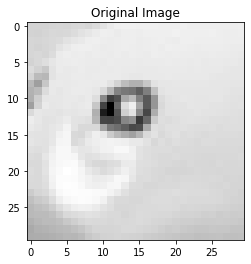

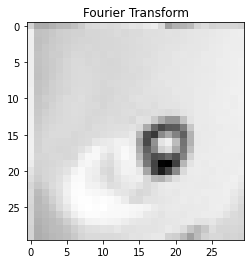

In [146]:
plt.imshow(np.log(1+np.abs(img_c1)),"gray"), plt.title ("Original Image")
plt.show()
plt.imshow(np.log(1+np.abs(img_c3)),"gray"), plt.title ("Fourier Transform")
plt.show()
